# KNN & PCA Assignment Solutions

## Theoretical Questions

### 1. What is K-Nearest Neighbors (KNN) and how does it work?
KNN is a simple, instance-based learning algorithm used for classification and regression. It works by:
1. Storing all available cases
2. Classifying new cases based on a similarity measure (distance function)
3. Finding the k nearest neighbors to the new case
4. For classification: Taking majority vote of neighbors
5. For regression: Taking average of neighbors

### 2. What is the difference between KNN Classification and KNN Regression?
- **KNN Classification**: Predicts the class of a new point by majority voting among its k nearest neighbors
- **KNN Regression**: Predicts the value of a new point by averaging the values of its k nearest neighbors

### 3. What is the role of the distance metric in KNN?
The distance metric determines how "similarity" between data points is calculated. Common metrics include:
- Euclidean distance (default)
- Manhattan distance
- Minkowski distance
- Cosine similarity
The choice of distance metric can significantly impact model performance.

### 4. What is the Curse of Dimensionality in KNN?
The curse of dimensionality refers to the phenomenon where as the number of features/dimensions increases, the distance between points becomes less meaningful, and all points tend to be equally distant from each other. This makes KNN less effective in high-dimensional spaces.

### 5. How can we choose the best value of K in KNN?
Common methods include:
- Using cross-validation to test different K values
- Choosing an odd K to avoid ties in classification
- Starting with K = sqrt(n) where n is number of samples
- Using elbow method to find point where error rate stabilizes

### 6. What are KD Tree and Ball Tree in KNN?
These are data structures used to efficiently compute nearest neighbors:
- **KD Tree**: Partitions space along data axes, efficient for low-dimensional data (D < 20)
- **Ball Tree**: Partitions space into nested hyper-spheres, better for high-dimensional data

### 7. When should you use KD Tree vs. Ball Tree?
- Use KD Tree when: D < 20, data is not too sparse, and distance metric is Euclidean
- Use Ball Tree when: D > 20, data is sparse, or using non-Euclidean metrics

### 8. What are the disadvantages of KNN?
- Computationally expensive for large datasets
- Sensitive to irrelevant features
- Requires feature scaling
- Performance degrades with high dimensions
- Needs careful selection of K and distance metric

### 9. How does feature scaling affect KNN?
KNN is distance-based, so features on larger scales dominate the distance calculation. Scaling ensures all features contribute equally. Common scaling methods include MinMax and Standard scaling.

### 10. What is PCA (Principal Component Analysis)?
PCA is a dimensionality reduction technique that transforms data into a new coordinate system where the greatest variance lies on the first axis (principal component), second greatest on the second axis, etc.

### 11. How does PCA work?
1. Standardize the data
2. Compute covariance matrix
3. Calculate eigenvalues and eigenvectors
4. Sort eigenvectors by eigenvalues
5. Project data onto selected eigenvectors

### 12. What is the geometric intuition behind PCA?
PCA finds the directions (principal components) along which the data varies the most. The first PC captures maximum variance, the second PC (orthogonal to first) captures next most variance, etc.

### 13. What is the difference between Feature Selection and Feature Extraction?
- **Feature Selection**: Choosing a subset of original features
- **Feature Extraction**: Creating new features from original ones (like PCA does)

### 14. What are Eigenvalues and Eigenvectors in PCA?
- **Eigenvectors**: Directions of maximum variance (principal components)
- **Eigenvalues**: Magnitude of variance along each eigenvector

### 15. How do you decide the number of components to keep in PCA?
Common methods:
- Keep components that explain a certain % of variance (e.g., 95%)
- Look for "elbow" in scree plot
- Use Kaiser criterion (keep eigenvalues > 1)

### 16. Can PCA be used for classification?
PCA itself is not a classifier, but it can be used as a preprocessing step before classification to reduce dimensionality and remove noise.

### 17. What are the limitations of PCA?
- Linear assumptions
- Sensitive to scaling
- Loses interpretability
- May discard useful variance for classification

### 18. How do KNN and PCA complement each other?
PCA can reduce dimensionality before KNN, making KNN more efficient and potentially more accurate by removing noise and irrelevant dimensions.

### 19. How does KNN handle missing values in a dataset?
KNN doesn't inherently handle missing values. Common approaches:
- Impute missing values (mean/median)
- Use distance metrics that handle missing values
- Use KNN imputation (predict missing values using KNN)

### 20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
- **PCA**: Unsupervised, maximizes variance, doesn't consider class labels
- **LDA**: Supervised, maximizes class separation, uses class labels

## Practical Questions

### 21. Train a KNN Classifier on the Iris dataset and print model accuracy

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier (using default K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy on Iris Dataset: {accuracy:.4f}")


KNN Classifier Accuracy on Iris Dataset: 1.0000


### 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE)

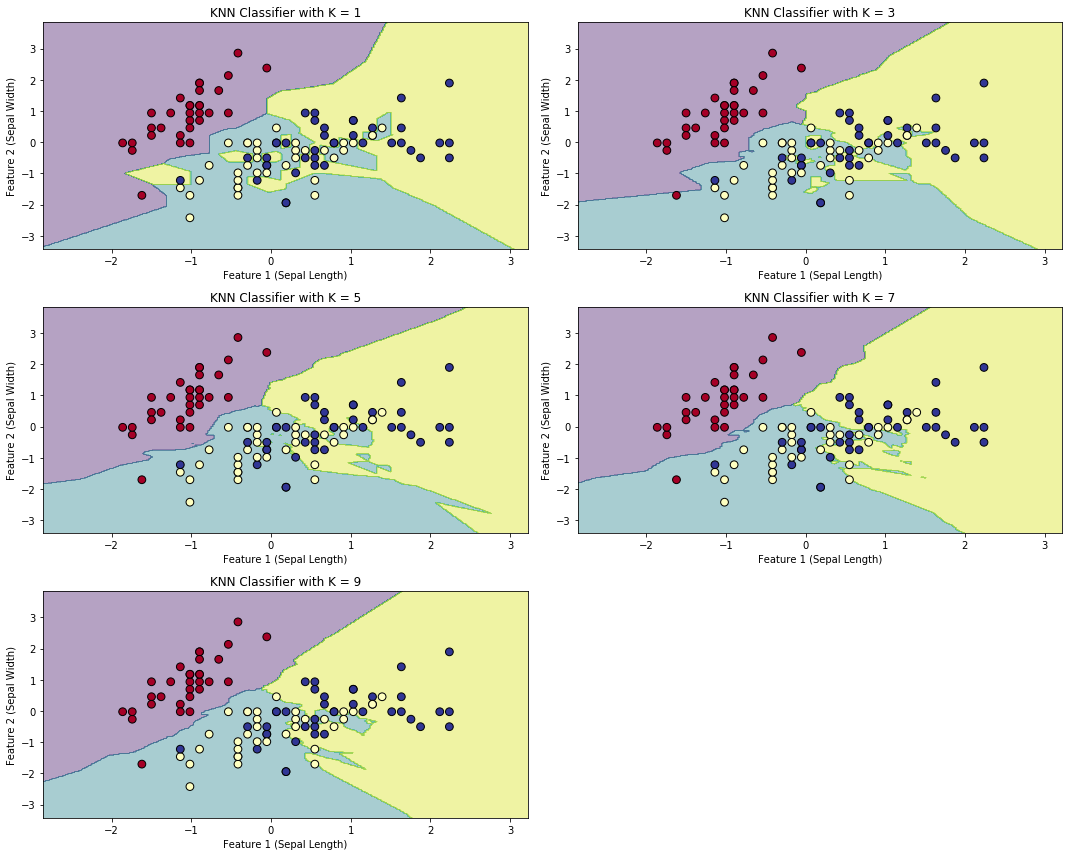

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Use only the first two features for 2D visualization
X = X[:, :2]  # Using only the first two features: sepal length and sepal width

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature scaling (important before using KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a mesh grid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Values of K to experiment with
k_values = [1, 3, 5, 7, 9]

# Plot decision boundaries for each value of K
plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):
    # Train KNN Classifier for the current value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predict on the mesh grid to get the decision boundary
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.subplot(3, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=60, cmap=plt.cm.RdYlBu)
    plt.title(f"KNN Classifier with K = {k}")
    plt.xlabel('Feature 1 (Sepal Length)')
    plt.ylabel('Feature 2 (Sepal Width)')

# Show the plot
plt.tight_layout()
plt.show()


### 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy

In [26]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature scaling (important before using KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier using Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)

# Predict and calculate accuracy with Euclidean distance
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Train KNN Classifier using Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)

# Predict and calculate accuracy with Manhattan distance
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Compare the results
print(f"Accuracy with Euclidean distance: {accuracy_euclidean:.4f}")
print(f"Accuracy with Manhattan distance: {accuracy_manhattan:.4f}")


Accuracy with Euclidean distance: 1.0000
Accuracy with Manhattan distance: 1.0000


### 24. Train a KNN Classifier with different values of K and visualize decision boundaries

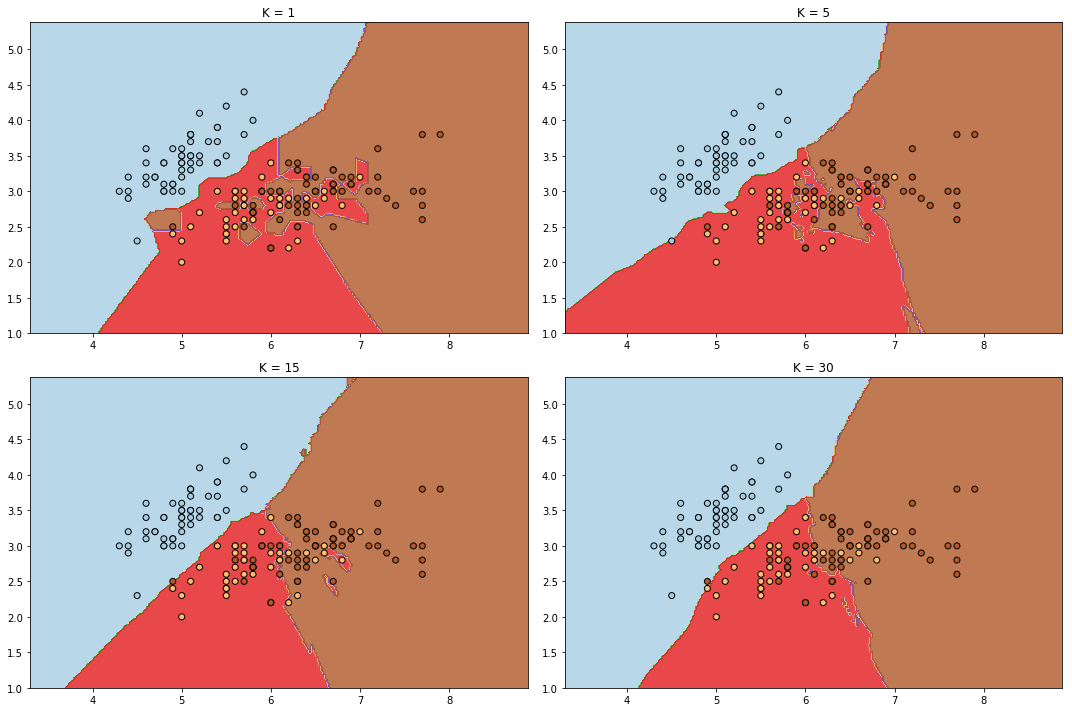

In [27]:
import matplotlib.pyplot as plt
# For visualization, we'll use 2 features
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Create mesh grid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot for different K values
plt.figure(figsize=(15, 10))
for i, k in enumerate([1, 5, 15, 30]):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, i+1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(f"K = {k}")
plt.tight_layout()
plt.show()

### 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data

In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. KNN Classifier without scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)

# Predict and calculate accuracy without scaling
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# 2. Apply feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier with scaled data
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_train_scaled, y_train)

# Predict and calculate accuracy with scaling
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# Compare the results
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")


Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


### 26. Train a PCA model on synthetic data and print the explained variance ratio for each component

Explained Variance Ratio for each component:
Component 1: 0.5947
Component 2: 0.2548
Component 3: 0.1505
Component 4: 0.0000
Component 5: 0.0000


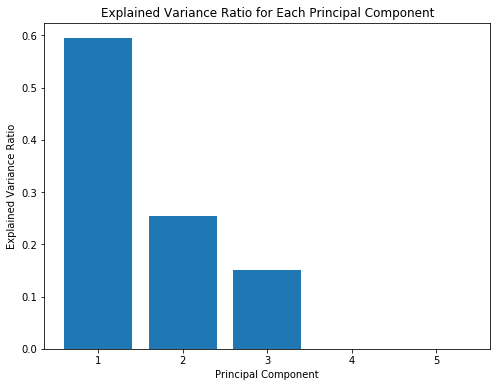

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data (100 samples, 5 features, 2 informative features)
X, y = make_classification(n_samples=100, n_features=5, n_informative=2, random_state=42)

# Train PCA model
pca = PCA()
X_pca = pca.fit_transform(X)

# Print the explained variance ratio for each component
print("Explained Variance Ratio for each component:")
for i, var_ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var_ratio:.4f}")

# Optionally, plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


### 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important before applying PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)

# Predict and calculate accuracy without PCA
y_pred_no_pca = knn_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

# Apply PCA (reduce to 2 components for simplicity)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train KNN classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)

# Predict and calculate accuracy with PCA
y_pred_with_pca = knn_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

# Compare the results
print(f"Accuracy without PCA: {accuracy_no_pca:.4f}")
print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")


Accuracy without PCA: 1.0000
Accuracy with PCA: 0.9556


### 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV

In [31]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit to data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation score: 0.95


### 29. Train a KNN Classifier and check the number of misclassified samples

In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN Classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the number of misclassified samples
misclassified_samples = np.sum(y_pred != y_test)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Number of misclassified samples: {misclassified_samples}")


Accuracy: 1.0000
Number of misclassified samples: 0


### 30. Train a PCA model and visualize the cumulative explained variance

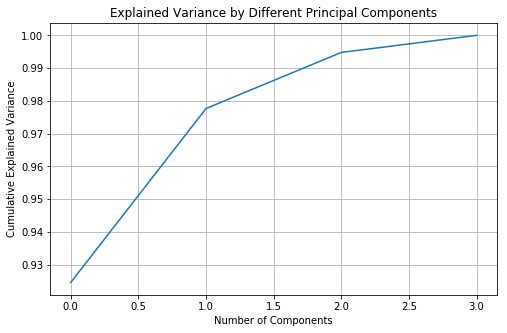

In [33]:
pca = PCA().fit(X)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid()
plt.show()

### 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy

In [34]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN Classifier with 'uniform' weights
knn_uniform = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uniform.fit(X_train, y_train)

# Predict on the test set
y_pred_uniform = knn_uniform.predict(X_test)

# Calculate accuracy for 'uniform' weights
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)

# Initialize KNN Classifier with 'distance' weights
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance.fit(X_train, y_train)

# Predict on the test set
y_pred_distance = knn_distance.predict(X_test)

# Calculate accuracy for 'distance' weights
accuracy_distance = accuracy_score(y_test, y_pred_distance)

# Compare the accuracy for both weight configurations
print(f"Accuracy with 'uniform' weights: {accuracy_uniform:.4f}")
print(f"Accuracy with 'distance' weights: {accuracy_distance:.4f}")


Accuracy with 'uniform' weights: 1.0000
Accuracy with 'distance' weights: 1.0000


### 32. Train a KNN Regressor and analyze the effect of different K values on performance

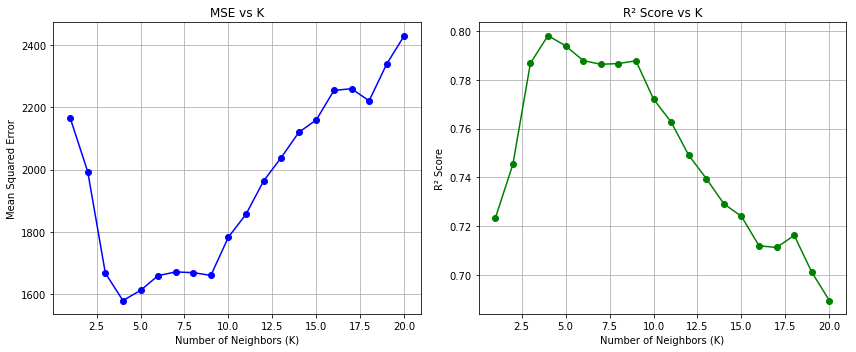

Optimal K (based on minimum MSE): 4
Lowest MSE: 1579.4321
Highest R² Score: 0.7981


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply feature scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of K values to test
k_values = range(1, 21)  # K values from 1 to 20
mse_scores = []
r2_scores = []

# Train and evaluate KNN Regressor for each K value
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = knn_regressor.predict(X_test_scaled)
    
    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)

# Plot MSE vs K
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', color='b')
plt.title('MSE vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Plot R² Score vs K
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='g')
plt.title('R² Score vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display optimal K based on minimum MSE
optimal_k = k_values[np.argmin(mse_scores)]
print(f"Optimal K (based on minimum MSE): {optimal_k}")
print(f"Lowest MSE: {min(mse_scores):.4f}")
print(f"Highest R² Score: {max(r2_scores):.4f}")


### 33. Implement KNN Imputation for handling missing values in a dataset

In [37]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Example: Create a DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, np.nan, 3, 8, 7],
    'C': [9, 8, 7, 6, np.nan]
}
df = pd.DataFrame(data)

# Display the original dataset with missing values
print("Original DataFrame with Missing Values:")
print(df)

# Initialize the KNNImputer with k=2 (use 2 nearest neighbors)
imputer = KNNImputer(n_neighbors=2)

# Apply KNN Imputation
df_imputed = imputer.fit_transform(df)

# Convert the numpy array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Display the imputed dataset
print("\nDataFrame after KNN Imputation:")
print(df_imputed)


Original DataFrame with Missing Values:
     A    B    C
0  1.0  5.0  9.0
1  2.0  NaN  8.0
2  NaN  3.0  7.0
3  4.0  8.0  6.0
4  5.0  7.0  NaN

DataFrame after KNN Imputation:
     A    B    C
0  1.0  5.0  9.0
1  2.0  4.0  8.0
2  1.5  3.0  7.0
3  4.0  8.0  6.0
4  5.0  7.0  7.0


In [38]:
import sklearn
print(sklearn.__version__)

1.0.2


In [39]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


### 34. Train a PCA model and visualize the data projection onto the first two principal components

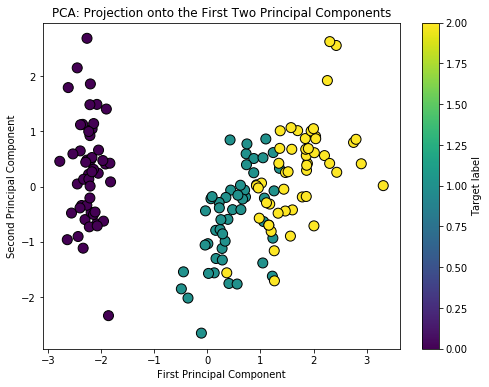

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load a sample dataset (Iris dataset in this case)
data = load_iris()
X = data.data
y = data.target

# Standardize the data (PCA is affected by scale, so we standardize)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce the dataset to 2 dimensions)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the data projected onto the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Target label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Projection onto the First Two Principal Components')
plt.show()


### 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare KD Tree and Ball Tree
algorithms = ['kd_tree', 'ball_tree']

for algo in algorithms:
    print(f"\nTraining with {algo.upper()} algorithm:")

    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training & prediction time: {train_time:.6f} seconds")



Training with KD_TREE algorithm:
Accuracy: 1.0000
Training & prediction time: 0.000997 seconds

Training with BALL_TREE algorithm:
Accuracy: 1.0000
Training & prediction time: 0.000000 seconds


### 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot

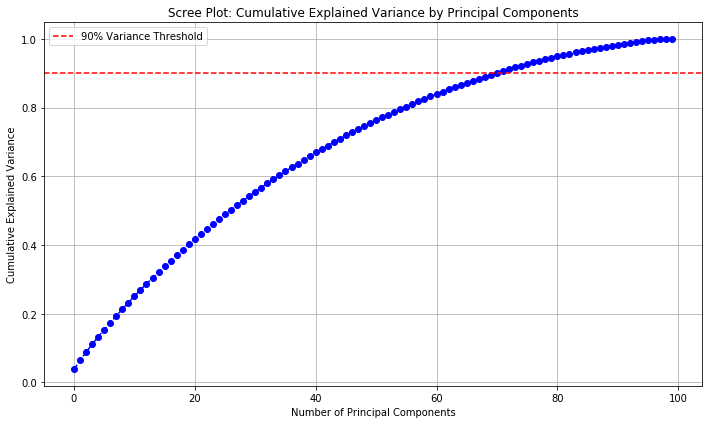

Number of components to explain 90% variance: 71


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Generate high-dimensional synthetic data (e.g., 100 features)
X, y = make_classification(n_samples=300, n_features=100, n_informative=10, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Optionally, print how many components explain 90% variance
cumulative_variance = np.cumsum(explained_variance)
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f"Number of components to explain 90% variance: {n_components_90}")


### 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score

In [44]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


### 38. Train a PCA model and analyze the effect of different numbers of components on accuracy

Components: 1, Accuracy: 0.96
Components: 2, Accuracy: 0.96
Components: 3, Accuracy: 1.00
Components: 4, Accuracy: 1.00


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

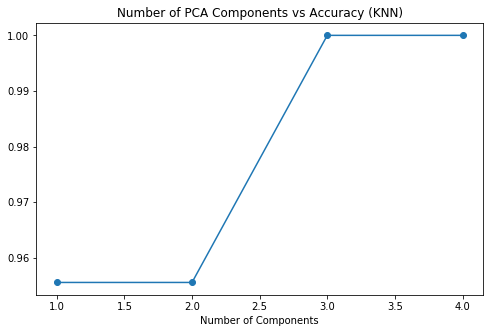

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Evaluate accuracy for different numbers of PCA components
n_components_range = range(1, X.shape[1] + 1)
accuracies = []

for n in n_components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_pca))
    accuracies.append(acc)
    print(f"Components: {n}, Accuracy: {acc:.2f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, accuracies, marker='o')
plt.title("Number of PCA Components vs Accuracy (KNN)")
plt.xlabel("Number of Components")
plt


### 39. Train a KNN Classifier with different leaf_size values and compare accuracy

Leaf size: 10, Accuracy: 1.00
Leaf size: 20, Accuracy: 1.00
Leaf size: 30, Accuracy: 1.00
Leaf size: 40, Accuracy: 1.00
Leaf size: 50, Accuracy: 1.00


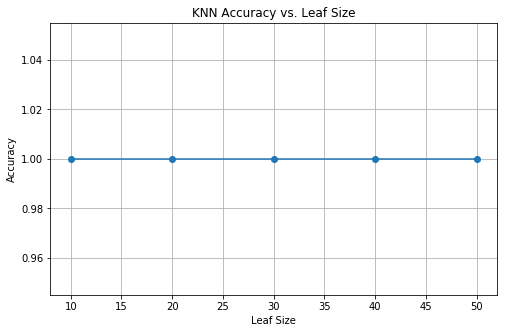

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Try different leaf_size values
leaf_sizes = [10, 20, 30, 40, 50]
accuracies = []

for size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Leaf size: {size}, Accuracy: {acc:.2f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o', linestyle='-')
plt.title("KNN Accuracy vs. Leaf Size")
plt.xlabel("Leaf Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### 40. Train a PCA model and visualize how data points are transformed before and after PCA

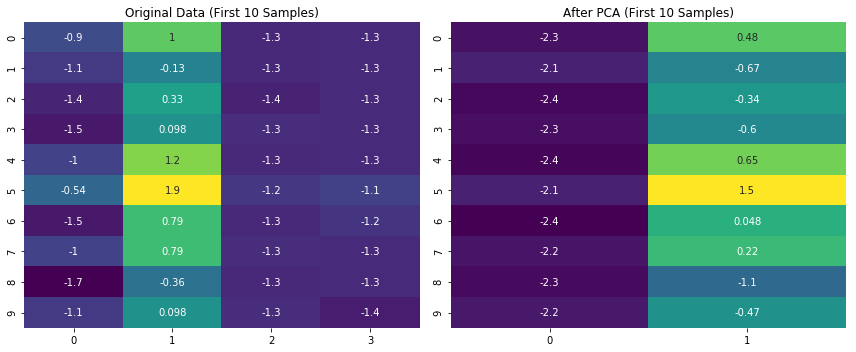

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot original data (first 10 samples) as heatmap
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(X_scaled[:10], annot=True, cmap='viridis', cbar=False)
plt.title("Original Data (First 10 Samples)")

# Plot PCA-transformed data (first 10 samples) as heatmap
plt.subplot(1, 2, 2)
sns.heatmap(X_pca[:10], annot=True, cmap='viridis', cbar=False)
plt.title("After PCA (First 10 Samples)")

plt.tight_layout()
plt.show()


### 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report

In [49]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN classifier (K=5 as default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



### 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Generate synthetic regression data
X, y = make_regression(n_samples=300, n_features=5, noise=10, random_state=42)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Try different distance metrics
distance_metrics = {
    'Euclidean': 'euclidean',
    'Manhattan': 'manhattan'
}

print("KNN Regressor Performance with Different Distance Metrics:\n")
for name, metric in distance_metrics.items():
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Distance:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.4f}\n")


KNN Regressor Performance with Different Distance Metrics:

Euclidean Distance:
  Mean Squared Error (MSE): 1312.12
  R² Score: 0.8815

Manhattan Distance:
  Mean Squared Error (MSE): 1336.92
  R² Score: 0.8793



### 43. Train a KNN Classifier and evaluate using ROC-AUC score

ROC-AUC Score: 0.9827


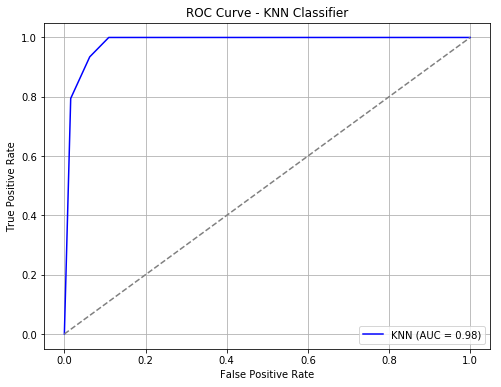

In [51]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict probabilities for the positive class
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### 44. Train a PCA model and visualize the variance captured by each principal component

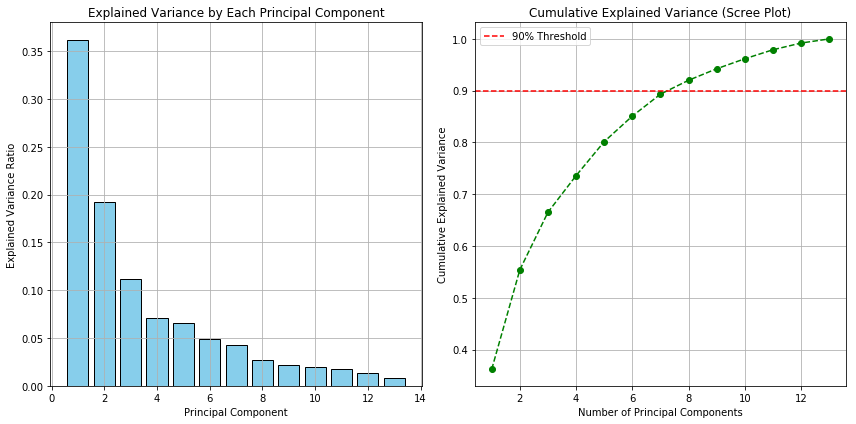

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_wine()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot variance explained by each component
plt.figure(figsize=(12, 6))

# Bar plot: Individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)

# Line plot: Cumulative explained variance (Scree Plot)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='green')
plt.title('Cumulative Explained Variance (Scree Plot)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 45. Train a KNN Classifier and perform feature selection before training 

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Select top 10 features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names (optional)
selected_features = feature_names[selector.get_support()]
print("Selected Features:\n", selected_features)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate
y_pred = knn.predict(X_test_scaled)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Selected Features:
 ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



### 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions 

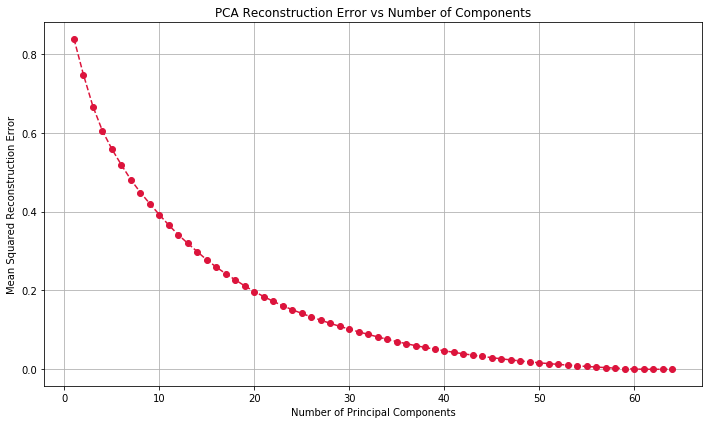

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset (images with 64 features = 8x8)
data = load_digits()
X = data.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different number of components
components_range = range(1, X.shape[1] + 1)
errors = []

for n in components_range:
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_reduced)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    errors.append(mse)

# Plot reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(components_range, errors, marker='o', linestyle='--', color='crimson')
plt.title('PCA Reconstruction Error vs Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.grid(True)
plt.tight_layout()
plt.show()


### 47. Train a KNN Classifier and visualize the decision boundary

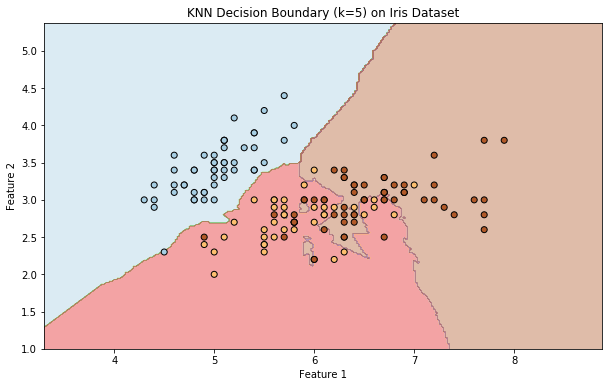

In [55]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset and select first two features for 2D visualization
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Create a mesh grid for visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict classes for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("KNN Decision Boundary (k=5) on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 48. Train a PCA model and analyze the effect of different numbers of components on data variance

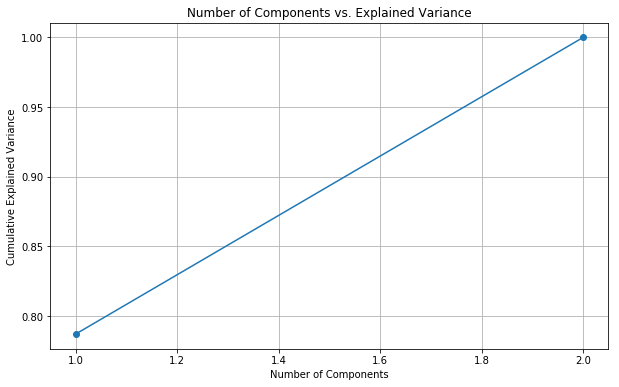

In [56]:
n_components = range(1, X.shape[1]+1)
explained_variances = []

for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.plot(n_components, explained_variances, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Components vs. Explained Variance')
plt.grid()
plt.show()

#### Thank You !!!